In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from ast import literal_eval
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

import eta_tools

/Users/amikano/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Handmade package 'eta_tools' successfully imported.


In [2]:
cwd = os.getcwd()

DOC = pd.read_csv(cwd+"/output/DOC.csv")
LIB = pd.read_csv(cwd+"/output/LIB.csv")
VOCAB = pd.read_csv(cwd+"/output/VOCAB.csv")

In [3]:
DOC

review_id  sent_id  token_id  \
0       Twelfth Night is a New Perspective at the Nati...        0         0   
1       Twelfth Night is a New Perspective at the Nati...        0         1   
2       Twelfth Night is a New Perspective at the Nati...        0         2   
3       Twelfth Night is a New Perspective at the Nati...        0         3   
4       Twelfth Night is a New Perspective at the Nati...        0         4   
...                                                   ...      ...       ...   
284664              ART's Julius Caesar Swings and Misses       38        20   
284665              ART's Julius Caesar Swings and Misses       38        21   
284666              ART's Julius Caesar Swings and Misses       38        22   
284667              ART's Julius Caesar Swings and Misses       38        23   
284668              ART's Julius Caesar Swings and Misses       38        24   

             term_str                pos_tuple  pos  
0              golden         ('golden', 'JJ')   JJ  
1               brown          ('brown', 'NN')   NN  
2              leaves        ('leaves', 'VBZ')  VBZ  
3            decorate      ('decorate', 'VBP')  VBP  
4                 the            ('the', 'DT')   DT  
...               ...                      ...  ...  
284664            not            ('not', 'RB')   RB  
284665             at             ('at', 'IN')   IN  
284666              a              ('a', 'DT')   DT  
284667  disassociated  ('disassociated', 'JJ')   JJ  
284668       distance       ('distance', 'NN')   NN  

[284669 rows x 6 columns]

In [4]:
LIB

Original Work                                       Review Title  \
0    Twelfth Night  Twelfth Night is a New Perspective at the Nati...   
1    Twelfth Night   Twelfth Night Offers Clarity with Complications    
2    Twelfth Night  Twelfth Night Goes for Synthesis through Antit...   
3    Twelfth Night  Shakespeare Set in the Summer of Love: "There'...   
4    Twelfth Night                  Big Things Come in Small Packages   
..             ...                                                ...   
287  Julius Caesar  Boredom from Julius Caesar? NYC Buries Pigeon ...   
288  Julius Caesar                  Stars Rise as Mighty Caesar Falls   
289  Julius Caesar                                 An American Caesar   
290  Julius Caesar      Julius Caesar Takes a Stab at the Shakespeare   
291  Julius Caesar              ART's Julius Caesar Swings and Misses   

            Review Author                                            Content  \
0       Christopher Adams  golden brown leaves decorate the edges of the ...   
1    Claudine Nightingale   ive been eagerly awaiting the arrival of  dor...   
2         Denise Battista  hear ye hear ye!  at stinson beach is now nort...   
3         Denise Battista  i was born in the 70s but that doesnt mean i w...   
4       Carrie Cleaveland  city lit's production of twelfth night proves ...   
..                    ...                                                ...   
287        Roseanne Wells  pigeon creek  company which originally hails f...   
288       Denise Battista  in s   the plot is simple.   is an ambitious p...   
289      Michael Kostroff   if youve never seen a play at theatricum bota...   
290   Georgina Petronella    is the first  play i ever read so perhaps it...   
291            Jess Pease  although it's sometimes hard to imagine in man...   

     Overall Rating    Genre Rating Category  
0                 3   Comedy        Negative  
1                 4   Comedy        Positive  
2                 4   Comedy        Positive  
3                 5   Comedy        Positive  
4                 4   Comedy        Positive  
..              ...      ...             ...  
287               1  Tragedy        Negative  
288               4  Tragedy        Positive  
289               4  Tragedy        Positive  
290               4  Tragedy        Positive  
291               2  Tragedy        Negative  

[292 rows x 7 columns]

In [5]:
lib_og_count = LIB["Original Work"].value_counts()
lib_og_count.to_csv(cwd+'/output/lib_og_count.csv')
lib_og_count

Midsummer Night's Dream      50
Hamlet                       40
Macbeth                      39
Twelfth Night                37
Romeo & Juliet               36
As You Like It               26
All's Well That Ends Well    19
Julius Caesar                19
Love's Labour's Lost         13
Othello                      13
Name: Original Work, dtype: int64

In [6]:
lib_genre_count = LIB["Genre"].value_counts()
lib_genre_count.to_csv(cwd+'/output/lib_genre_count.csv')
lib_genre_count

Tragedy    147
Comedy     145
Name: Genre, dtype: int64

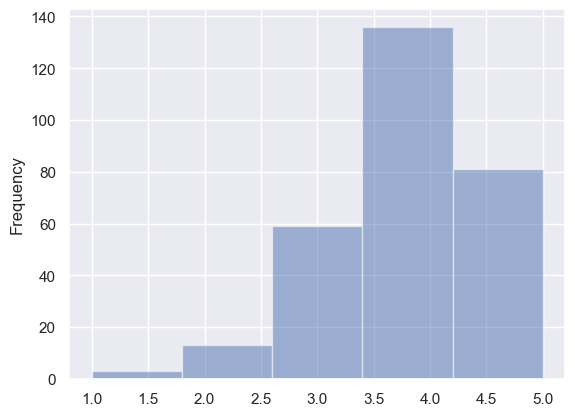

In [7]:
LIB["Overall Rating"].plot.hist(bins=5, alpha=0.5);

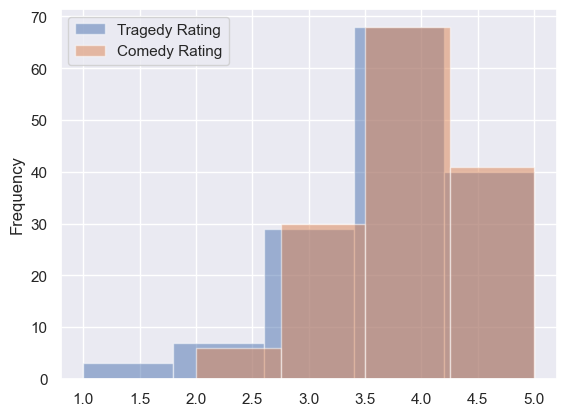

In [8]:
fig, ax = plt.subplots()
LIB[LIB.Genre=="Tragedy"]["Overall Rating"].to_frame("Tragedy Rating")\
                .reset_index().drop("index", axis=1).plot.hist(bins=5, alpha=0.5, ax=ax)
LIB[LIB.Genre=="Comedy"]["Overall Rating"].to_frame("Comedy Rating")\
                .reset_index().drop("index", axis=1).plot.hist(bins=4, alpha=0.5, ax=ax);

fig.savefig(cwd+'/output/images/rating_histogram.png')

In [9]:
VOCAB = VOCAB.set_index('term_str')

In [10]:
VOCAB.sort_values('n', ascending=False)

n  n_chars         p          i max_pos
term_str                                                
the          19214        3  0.067496   3.889056      DT
and          10397        3  0.036523   4.775046      CC
of            8942        2  0.031412   4.992544      IN
a             7696        1  0.027035   5.209033      DT
to            6431        2  0.022591   5.468098      TO
...            ...      ...       ...        ...     ...
introverted      1       11  0.000004  18.118926     VBN
intrude          1        7  0.000004  18.118926      JJ
intrusively      1       11  0.000004  18.118926      RB
intuitive        1        9  0.000004  18.118926      JJ
à                1        1  0.000004  18.118926     NNP

[22948 rows x 5 columns]

## Topic Modeling

In [11]:
noun_verb = ["NN", "NNS", 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']  

In [12]:
DOC = DOC[DOC.pos.isin(noun_verb)]
VOCAB = VOCAB[VOCAB.max_pos.isin(noun_verb)]

In [13]:
model = eta_tools.topic_model(DOC, 20)

In [14]:
model.topics.to_csv(cwd+'/output/topic.csv')

model.topics.sort_values("term_freq", ascending=False).head(5)

term_str           0          1           2           3         4  \
topic_id                                                            
T06             cast   director  production  characters  audience   
T07          costume   designer       stage      design  costumes   
T01       production  character       works   portrayal   theater   
T15             play   language        duke        lost  audience   
T03       production      plays        love       makes  audience   

term_str            5           6  \
topic_id                            
T06            actors       sound   
T07               set    lighting   
T01       performance     theatre   
T15            scenes  production   
T03              role       night   

term_str                                              label  doc_weight_sum  \
topic_id                                                                      
T06       T06 cast, director, production, characters, au...      740.800515   
T07       T07 costume, designer, stage, design, costumes...      708.621391   
T01       T01 production, character, works, portrayal, t...      763.740034   
T15       T15 play, language, duke, lost, audience, scen...      712.627962   
T03       T03 production, plays, love, makes, audience, ...      722.267039   

term_str  term_freq  
topic_id             
T06        0.057379  
T07        0.055735  
T01        0.055294  
T15        0.054133  
T03        0.053630

In [15]:
negative_review = list(LIB[LIB["Rating Category"]=='Negative']["Review Title"])

model_low_rating = eta_tools.topic_model(DOC[DOC["review_id"].isin(negative_review)], 5)
# model_low_rating.topics.sort_values("term_freq", ascending=False)
model_low_rating.topics

term_str           0         1            2         3           4          5  \
topic_id                                                                       
T0        production     stage        scene      does  characters  character   
T1        production      play     director    actors       stage    theatre   
T2              play     stage   production       set        love       look   
T3        production      play  performance  audience        role       cast   
T4        production  audience         play      time       scene      stage   

term_str         6                                              label  \
topic_id                                                                
T0        audience  T0 production, stage, scene, does, characters,...   
T1            make  T1 production, play, director, actors, stage, ...   
T2          design  T2 play, stage, production, set, love, look, d...   
T3         theatre  T3 production, play, performance, audience, ro...   
T4           plays  T4 production, audience, play, time, scene, st...   

term_str  doc_weight_sum  term_freq  
topic_id                             
T0            702.703283   0.217874  
T1            606.621677   0.183050  
T2            693.538423   0.204155  
T3            668.793775   0.196428  
T4            669.342841   0.198492

In [16]:
positive_review = list(LIB[LIB["Rating Category"]=='Positive']["Review Title"])

model_high_rating = eta_tools.topic_model(DOC[DOC["review_id"].isin(positive_review)], 5)
# model_high_rating.topics.sort_values("term_freq", ascending=False)
model_high_rating.topics

term_str           0           1           2         3      4            5  \
topic_id                                                                     
T0        production    director       stage    design    set       actors   
T1              play  characters  production     night  stage        scene   
T2              play  production    audience     plays  dream    midsummer   
T3        production        play         set  audience  scene  performance   
T4              love       stage        play  audience    man          end   

term_str       6                                              label  \
topic_id                                                              
T0         scene  T0 production, director, stage, design, set, a...   
T1        actors  T1 play, characters, production, night, stage,...   
T2         stage  T2 play, production, audience, plays, dream, m...   
T3         lines  T3 production, play, set, audience, scene, per...   
T4          cast     T4 love, stage, play, audience, man, end, cast   

term_str  doc_weight_sum  term_freq  
topic_id                             
T0           2110.474999   0.214782  
T1           1908.954862   0.186447  
T2           2025.399519   0.207677  
T3           1930.960540   0.184784  
T4           2117.210081   0.206311

## Sentiment Analysis

In [17]:
emo_cols = "anger anticipation disgust fear joy sadness surprise sentiment".split()

In [18]:
SALEX = pd.read_csv(cwd+"/salex_nrc.csv").set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]
SALEX = SALEX.drop("trust", axis=1)

In [19]:
V = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1)

In [20]:
tfidf = eta_tools.TFIDF(eta_tools.BOW(DOC))[0].stack().to_frame('tfidf')

In [21]:
B = tfidf.join(V[emo_cols], on='term_str', rsuffix='_v').dropna()
B = B.reset_index().join(LIB[['Review Title', "Genre", "Original Work", 
                              "Review Author", "Overall Rating", "Rating Category"]]\
                         .set_index("Review Title"), on="review_id")

for col in emo_cols:
    B[col] = B[col] * B.tfidf

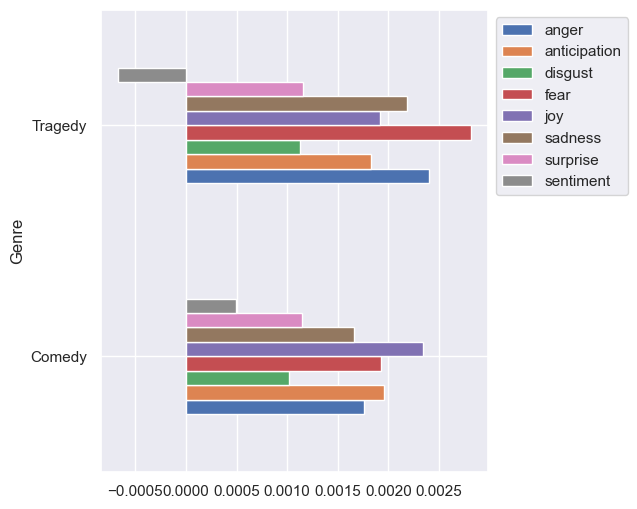

In [22]:
EMO_genre = B.groupby(['Genre'])[emo_cols].mean()

fig, ax = plt.subplots(1)
EMO_genre.plot.barh(figsize=(5,6), ax=ax).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_genre.png', bbox_inches='tight')

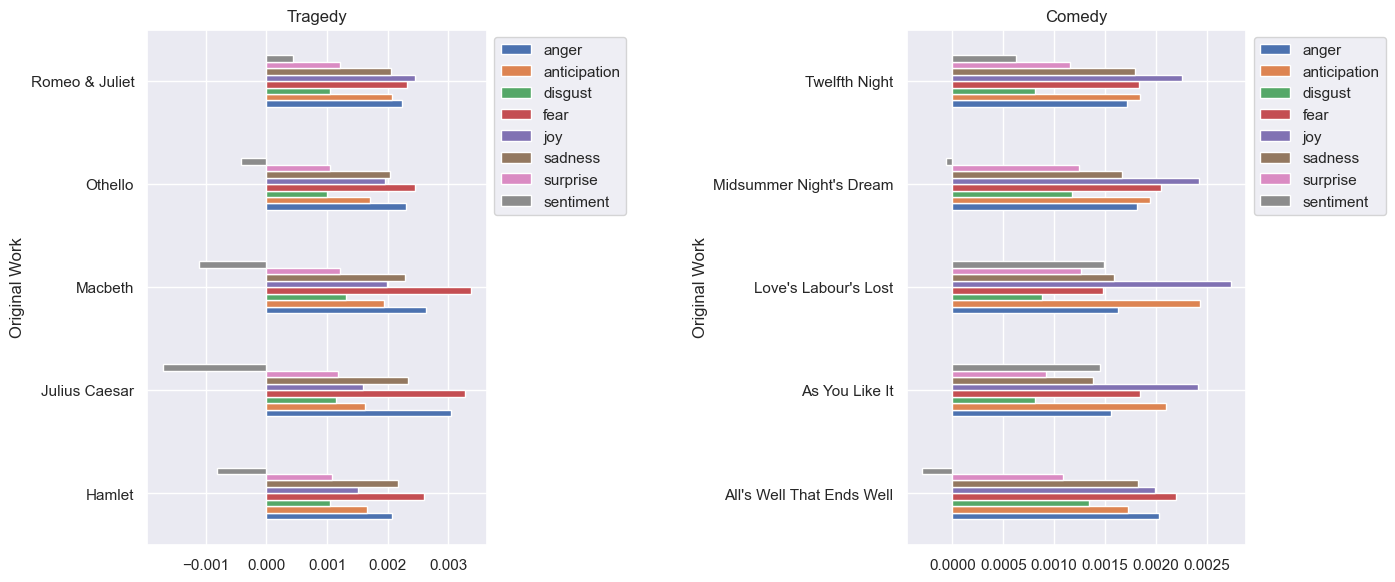

In [23]:
EMO_tragedy_work = B[B.Genre=="Tragedy"].groupby(["Original Work"])[emo_cols].mean()
EMO_comedy_work = B[B.Genre=="Comedy"].groupby(["Original Work"])[emo_cols].mean()

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.tight_layout(pad=6.0)
EMO_tragedy_work.plot.barh(figsize=(18,10), title="Tragedy", ax=ax).legend(bbox_to_anchor=(1.0, 1.0))
EMO_comedy_work.plot.barh(figsize=(18,10), title="Comedy", ax=ax2).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_title_genre.png')

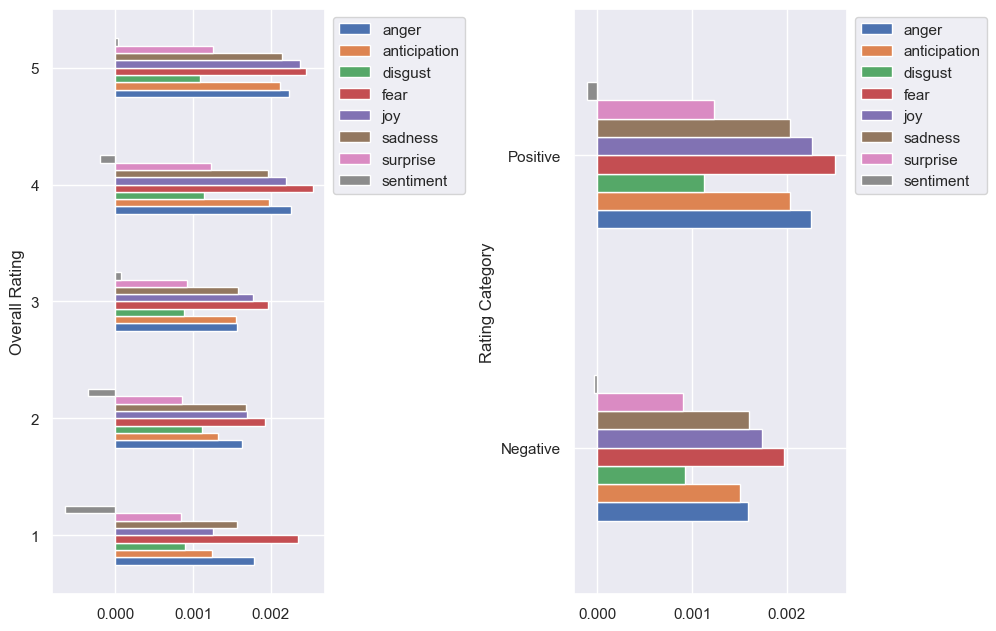

In [24]:
EMO_rating = B.groupby(['Overall Rating'])[emo_cols].mean()
EMO_act_rating = B.groupby(['Rating Category'])[emo_cols].mean()

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.tight_layout(pad=5.0)
EMO_rating.plot.barh(figsize=(12,10), ax=ax).legend(bbox_to_anchor=(1.0, 1.0))
EMO_act_rating.plot.barh(figsize=(12,10), ax=ax2).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_rating.png')

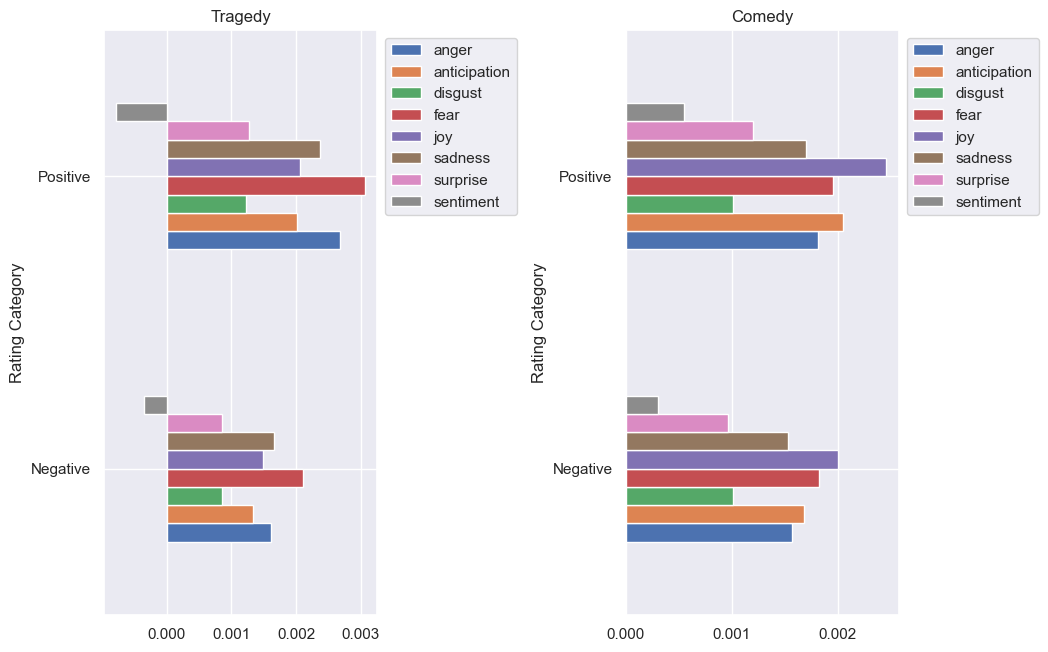

In [25]:
EMO_tragedy_rating = B[B.Genre=="Tragedy"].groupby(["Rating Category"])[emo_cols].mean()
EMO_comedy_rating = B[B.Genre=="Comedy"].groupby(["Rating Category"])[emo_cols].mean()

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.tight_layout(pad=5.0)
EMO_tragedy_rating.plot.barh(figsize=(12,10), title="Tragedy", ax=ax).legend(bbox_to_anchor=(1.0, 1.0))
EMO_comedy_rating.plot.barh(figsize=(12,10), title="Comedy", ax=ax2).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_rating_genre.png')

## PCA

In [26]:
tfidf, dfidf = eta_tools.TFIDF(eta_tools.BOW(DOC))

VOCAB = VOCAB.join(dfidf.to_frame("dfidf"), on="term_str")

top_nouns = VOCAB[VOCAB["max_pos"].isin(["NN", "NNS"])].sort_values("dfidf", ascending=False).head(1000).index

reduced_tfidf = tfidf[top_nouns.values]

reduced_tfidf.to_csv(cwd+'/output/reduced_tfidf.csv')

reduced_tfidf

term_str                                            performances     story  \
review_id                                                                    
 A Decisive Hamlet in a Post-colonial World             0.000000  0.114568   
"As You Like It" Amiable at the Folger                  0.000000  0.000000   
"As You Like It" As It Should Be                        0.000000  0.156777   
80s Throwback is a Dream                                0.000000  0.000000   
A Beautiful Bard Ballet                                 0.295116  0.297877   
...                                                          ...       ...   
Witch's View                                            0.134144  0.000000   
Witches Rule in Macbeth's Court                         0.000000  0.000000   
Words, words, words...although not as many as y...      0.105399  0.000000   
Youthful and Musical Twelfth Night at the PST           0.086799  0.000000   
iHamlet at the Philly Fringe                            0.000000  0.000000   

term_str                                               sense  designer  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.000000  0.000000   
"As You Like It" Amiable at the Folger              0.000000  0.000000   
"As You Like It" As It Should Be                    0.158245  0.000000   
80s Throwback is a Dream                            0.000000  0.000000   
A Beautiful Bard Ballet                             0.000000  0.000000   
...                                                      ...       ...   
Witch's View                                        0.000000  0.000000   
Witches Rule in Macbeth's Court                     0.000000  0.000000   
Words, words, words...although not as many as y...  0.000000  0.000000   
Youthful and Musical Twelfth Night at the PST       0.088431  0.088431   
iHamlet at the Philly Fringe                        0.107380  0.000000   

term_str                                               world      text  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.116723  0.000000   
"As You Like It" Amiable at the Folger              0.054193  0.048462   
"As You Like It" As It Should Be                    0.000000  0.000000   
80s Throwback is a Dream                            0.000000  0.000000   
A Beautiful Bard Ballet                             0.000000  0.000000   
...                                                      ...       ...   
Witch's View                                        0.000000  0.000000   
Witches Rule in Macbeth's Court                     0.000000  0.000000   
Words, words, words...although not as many as y...  0.000000  0.000000   
Youthful and Musical Twelfth Night at the PST       0.000000  0.000000   
iHamlet at the Philly Fringe                        0.000000  0.193848   

term_str                                            something     roles  \
review_id                                                                 
 A Decisive Hamlet in a Post-colonial World          0.000000  0.000000   
"As You Like It" Amiable at the Folger               0.110426  0.000000   
"As You Like It" As It Should Be                     0.000000  0.082901   
80s Throwback is a Dream                             0.000000  0.000000   
A Beautiful Bard Ballet                              0.000000  0.000000   
...                                                       ...       ...   
Witch's View                                         0.000000  0.000000   
Witches Rule in Macbeth's Court                      0.081367  0.165802   
Words, words, words...although not as many as y...   0.110426  0.000000   
Youthful and Musical Twelfth Night at the PST        0.000000  0.000000   
iHamlet at the Philly Fringe                         0.000000  0.000000   

term_str                                               place       act  ...  \
revi

In [27]:
loadings, dcm, compinf = eta_tools.PCA(X=reduced_tfidf, 
                              k=10, 
                              norm_docs=True, 
                              center_by_mean=False,
                              center_by_variance=False)

In [28]:
dcm  = dcm.join(LIB[['Review Title', "Genre", "Original Work", "Review Author", "Rating Category"]]\
                .set_index("Review Title"), on="review_id")

dcm.to_csv(cwd+'/output/pca_dcm.csv')
loadings.to_csv(cwd+'/output/pca_loadings.csv')
compinf.to_csv(cwd+'/output/pca_compinf.csv')

dcm

PC0       PC1  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World        -0.275956 -0.117786   
"As You Like It" Amiable at the Folger             -0.361199  0.010226   
"As You Like It" As It Should Be                   -0.377967 -0.041251   
80s Throwback is a Dream                           -0.298445  0.216666   
A Beautiful Bard Ballet                            -0.220262 -0.012458   
...                                                      ...       ...   
Witch's View                                       -0.245023 -0.153601   
Witches Rule in Macbeth's Court                    -0.310391 -0.168787   
Words, words, words...although not as many as y... -0.258090 -0.025737   
Youthful and Musical Twelfth Night at the PST      -0.321904 -0.076933   
iHamlet at the Philly Fringe                       -0.264427 -0.062490   

                                                         PC2       PC3  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.095281 -0.014640   
"As You Like It" Amiable at the Folger             -0.193969  0.104559   
"As You Like It" As It Should Be                   -0.056855  0.032752   
80s Throwback is a Dream                            0.009563 -0.012153   
A Beautiful Bard Ballet                             0.034514  0.124147   
...                                                      ...       ...   
Witch's View                                        0.231240 -0.281274   
Witches Rule in Macbeth's Court                     0.240377 -0.309043   
Words, words, words...although not as many as y...  0.009582  0.058873   
Youthful and Musical Twelfth Night at the PST      -0.274879 -0.074140   
iHamlet at the Philly Fringe                        0.007565  0.038026   

                                                         PC4       PC5  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.037976 -0.031117   
"As You Like It" Amiable at the Folger              0.308214  0.222330   
"As You Like It" As It Should Be                    0.085591 -0.010772   
80s Throwback is a Dream                            0.001361 -0.011384   
A Beautiful Bard Ballet                            -0.024803 -0.101835   
...                                                      ...       ...   
Witch's View                                        0.012418  0.120180   
Witches Rule in Macbeth's Court                     0.018948  0.115708   
Words, words, words...although not as many as y... -0.009682 -0.049367   
Youthful and Musical Twelfth Night at the PST      -0.177665  0.099956   
iHamlet at the Philly Fringe                       -0.033246 -0.067514   

                                                         PC6       PC7  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.012781  0.006352   
"As You Like It" Amiable at the Folger             -0.164878  0.148046   
"As You Like It" As It Should Be                    0.024690  0.078206   
80s Throwback is a Dream                           -0.061546  0.021329   
A Beautiful Bard Ballet                             0.009804  0.106686   
...                                                      ...       ...   
Witch's View                                       -0.132865 -0.124755   
Witches Rule in Macbeth's Court                    -0.182031 -0.052961   
Words, words, words...although not as many as y... -0.045762  0.016144   
Youthful and Musical Twelfth Night at the PST       0.197662  0.002281   
iHamlet at the Philly Fringe                        0.079580  0.069444   

                                                         PC8       PC9  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.136

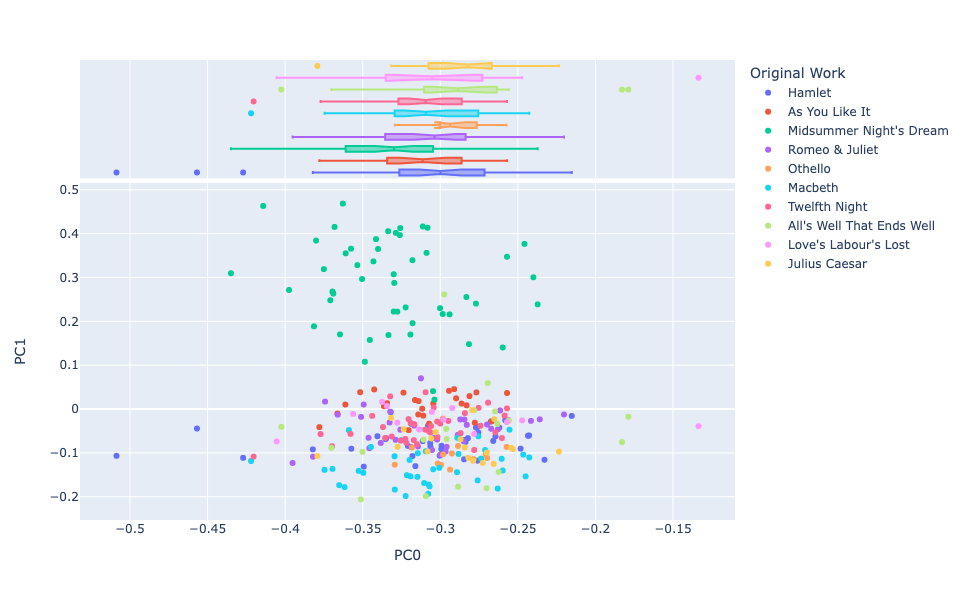

In [29]:
eta_tools.vis_pcs(dcm, 0, 1, label='Original Work', hover_name="Original Work")

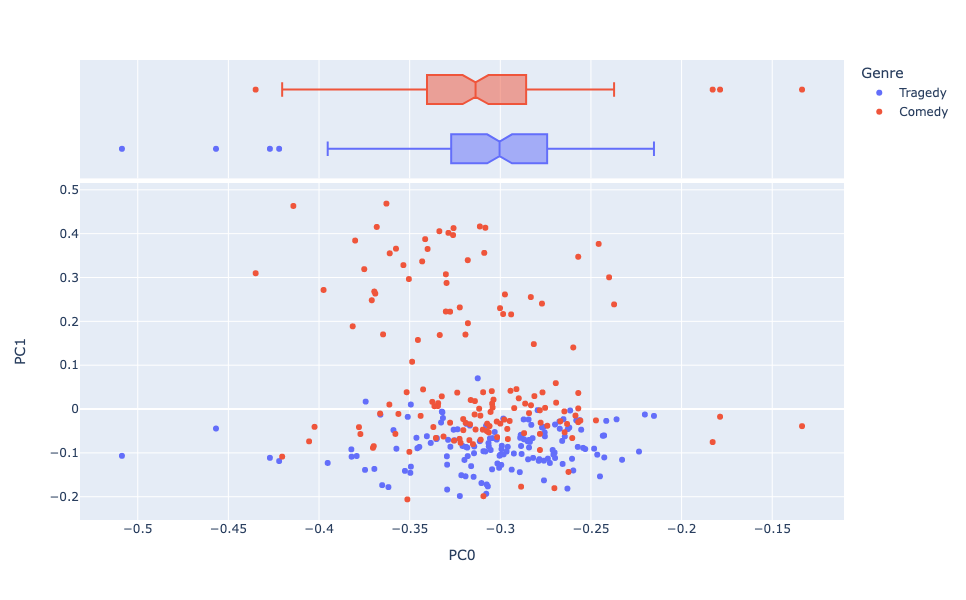

In [30]:
eta_tools.vis_pcs(dcm, 0, 1, label='Genre', hover_name="Original Work")

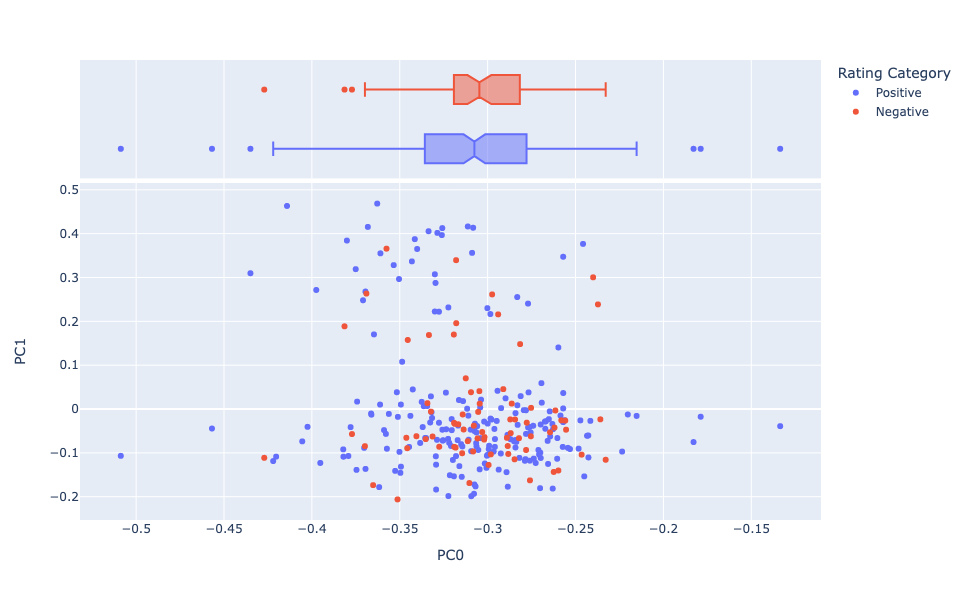

In [31]:
eta_tools.vis_pcs(dcm, 0, 1, label='Rating Category', hover_name="Original Work")

## Word Embeddings

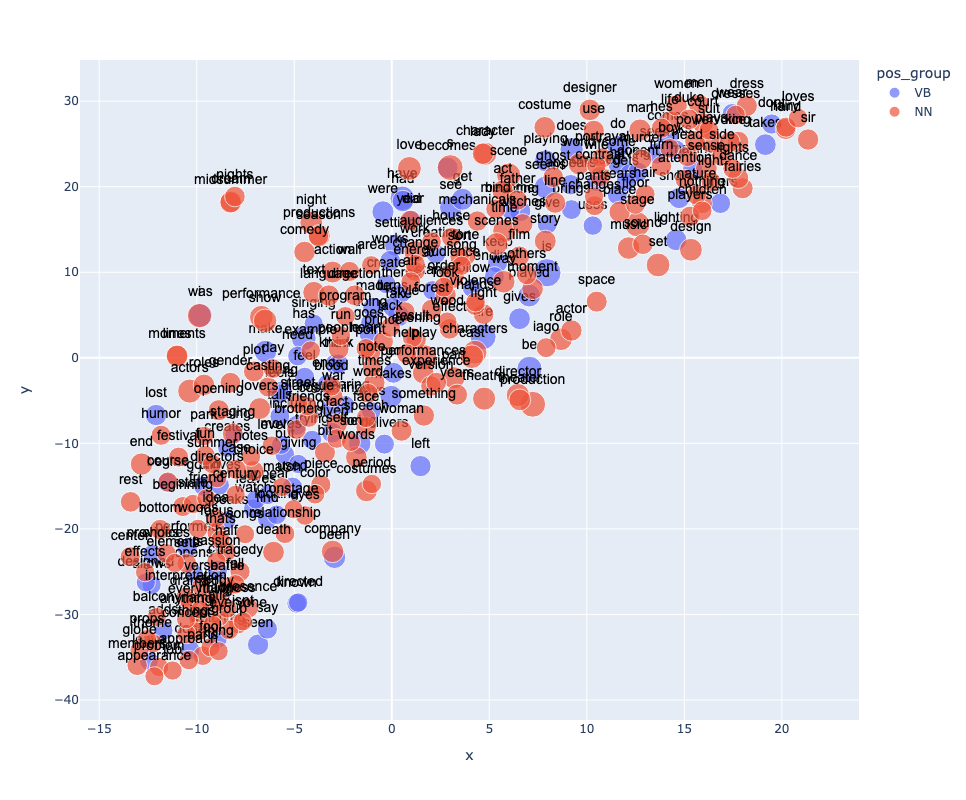

In [32]:
gensim = eta_tools.gensim_corpus(DOC, ['review_id'])

gensim.word2vec(min_count=50)

gensim.generate_coords()

gensim.plot().show()

In [33]:
gensim.get_most_similar("design")

term       sim
0  designer  0.999401
1  lighting  0.998095
2       set  0.998094
3  costumes  0.997652
4     sound  0.997367
5   costume  0.997129
6     music  0.997117
7   effects  0.997091
8     dress  0.997086
9       use  0.997015

In [34]:
gensim.get_most_similar("act")

term       sim
0   murder  0.999351
1   become  0.999343
2     wife  0.999331
3     song  0.999330
4     head  0.999319
5      bit  0.999311
6  witches  0.999302
7     king  0.999296
8    given  0.999295
9      way  0.999292